# Data from magnetic antennas

In [9]:
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import matplotlib.dates as mdates
import datetime

%pylab inline --no-import-all

directory = '/storage/experiments/2022/0624_bourka_CAR1'

filename = '2022.06.24.20.29.34.002636'

video_file = directory + '/chronos/' + filename + '.mp4'
csv_file = directory + '/chronos/' + filename + '.mp4.csv'
#wfm_file = directory + '/slavia/' + filename + '.wfm'
wfm_file = directory + '/osciloskop/' + filename + '.wfm'


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# wfm file

In [10]:
dt = np.dtype([('a', 'u1')])
bytes_read = np.fromfile(wfm_file, dtype=dt)

In [11]:
offset = 0x10
SetupSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C
LAdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x1c
CHdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x30
MemDepth = int.from_bytes(bytes_read[offset:offset+4], "big")
print(CHdataSize, MemDepth)
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x39
#ch1 = list(bytes_read[offset:offset+CHdataSize:2])
#ch2 = bytes_read[offset+1:offset+CHdataSize:2]
df4 = pd.DataFrame(bytes_read[offset+3:offset+CHdataSize:4])
df3 = pd.DataFrame(bytes_read[offset+2:offset+CHdataSize:4])
df2 = pd.DataFrame(bytes_read[offset+1:offset+CHdataSize:4])
df1 = pd.DataFrame(bytes_read[offset:offset+CHdataSize:4])
df1['time']=pd.to_datetime(df1.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df1.set_index('time', inplace=True)
df2['time']=pd.to_datetime(df2.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df2.set_index('time', inplace=True)
df3['time']=pd.to_datetime(df3.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df3.set_index('time', inplace=True)
df4['time']=pd.to_datetime(df4.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df4.set_index('time', inplace=True)


500000032 125000000


In [30]:
xx1 = df1.resample('20us', closed='left').mean()
xx2 = df2.resample('1us', closed='left').mean()
xx3 = df3.resample('1us', closed='left').mean()
xx4 = df4.resample('1us', closed='left').mean()

TIMEOFFSET = -1250
#time offset
xx1.index = xx1.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx2.index = xx2.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx3.index = xx3.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx4.index = xx4.index + datetime.timedelta(milliseconds=TIMEOFFSET)

In [13]:
y = pd.read_csv(csv_file)
y['time'] = (y.index)*(1/1610)

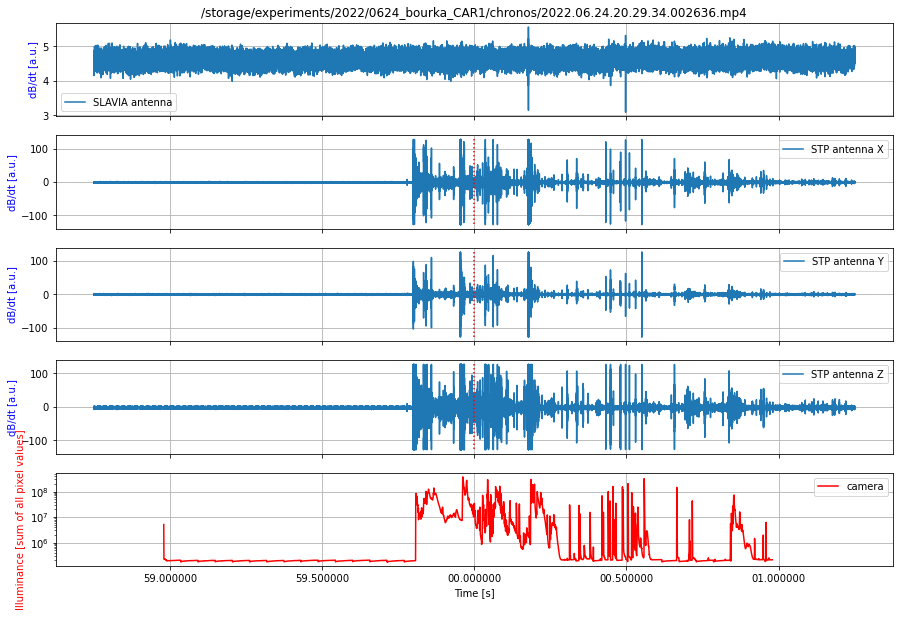

In [33]:
TIMEOFFSET = -1250 + 230


fig, (ax0, ax1,  ax2, ax3, ax4) = plt.subplots(figsize=(15, 10), nrows=5, sharex=True)

ax0.plot(xx1-123, label='SLAVIA antenna')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
#ax0.legend(loc = "upper left")
ax0.legend()
ax0. set_title(video_file)

ax1.plot(xx2-128, label='STP antenna X')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
#ax1.legend(loc = "upper left")
ax1.legend()
ax1.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax2.plot(xx3-128, label='STP antenna Y')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
#ax1.legend(loc = "upper left")
ax2.legend()
ax2.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax3.plot(xx4-128, label='STP antenna Z')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.grid()
#ax1.legend(loc = "upper left")
ax3.legend()
ax3.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

#ax1.set_xlim(pd.to_datetime(0.66, unit='s'),pd.to_datetime(0.72, unit='s'))
#!!!ax1.set_xlim(pd.to_datetime(0.5, unit='s'),pd.to_datetime(2., unit='s'))
#ax1.set_xlim(pd.to_datetime(1., unit='s'),pd.to_datetime(1.19, unit='s'))

y['time'] = pd.to_datetime((y.index)*(1/1612.38), unit='s')

#ax2.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera', marker='.')
ax4.plot(y['time'] + datetime.timedelta(milliseconds=TIMEOFFSET), y['0'], c='red', label='camera')
ax4.set_yscale('log')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Illuminance [sum of all pixel values]', c='r')
ax4.grid()
ax4.legend(loc = "upper right")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%S.%f'))
#plt.ylim(90,10e2)